In [301]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

              unit,na_item,geo\time   Country   2005   2006   2007   2008  \
0   PC_EU27_2020_MPPS_CP,NLPR_HW,AT   Austria  117.5  117.8  116.8  116.3   
1  PC_EU27_2020_MPPS_CP,NLPR_PER,AT   Austria  122.2  121.3  119.5  118.5   
2   PC_EU27_2020_MPPS_CP,NLPR_HW,BE   Belgium  142.8  139.9  138.0  136.2   
3  PC_EU27_2020_MPPS_CP,NLPR_PER,BE   Belgium  133.6  132.1  130.4  127.9   
4   PC_EU27_2020_MPPS_CP,NLPR_HW,BG  Bulgaria   37.6   37.5   38.8   39.5   

    2009   2010   2011   2012   2013   2014   2015   2016   2017   2018  \
0  117.5  115.6  115.1  118.0  117.9  118.1  119.7  119.5  117.5  117.8   
1  118.3  115.7  115.6  118.1  117.4  117.0  117.4  117.8  115.8  116.5   
2  136.8  138.0  134.0  135.2  134.7  136.1  136.8  136.5  134.0  133.5   
3  128.7  130.4  128.0  130.2  130.3  131.5  131.7  130.9  129.6  129.3   
4   40.1   41.9   42.9   44.1   42.9   44.1   44.5   45.8   45.9   47.2   

    2019   2020  Unnamed: 18  
0  115.9  117.4          NaN  
1  115.5  114.5         

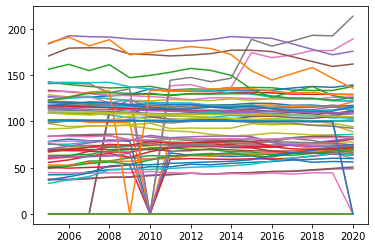

[[ 1.     0.259  0.134  0.511  0.137  0.148  0.41   0.292  0.078  0.019
   0.04   0.131  0.037  0.036 -0.399 -0.405 -0.216 -0.314  0.137  0.052
   0.238  0.247 -0.421 -0.406  0.009]
 [ 0.259  1.     0.712  0.624 -0.823 -0.813 -0.294 -0.456 -0.625 -0.737
  -0.876 -0.817 -0.893 -0.887  0.56   0.508  0.752  0.727  0.801  0.765
   0.592  0.615 -0.488 -0.379 -0.797]
 [ 0.134  0.712  1.     0.674 -0.657 -0.62  -0.721 -0.821 -0.482 -0.531
  -0.582 -0.482 -0.714 -0.708  0.414  0.556  0.809  0.692  0.588  0.625
   0.168  0.166 -0.361 -0.28  -0.733]
 [ 0.511  0.624  0.674  1.    -0.334 -0.339 -0.153 -0.33  -0.439 -0.441
  -0.3   -0.203 -0.456 -0.438 -0.084 -0.093  0.405  0.404  0.566  0.52
   0.065  0.086 -0.555 -0.448 -0.602]
 [ 0.137 -0.823 -0.657 -0.334  1.     0.995  0.556  0.625  0.744  0.865
   0.945  0.888  0.96   0.953 -0.857 -0.807 -0.798 -0.794 -0.61  -0.664
  -0.391 -0.409  0.112  0.001  0.683]
 [ 0.148 -0.813 -0.62  -0.339  0.995  1.     0.523  0.605  0.766  0.883
   0.94   0.892  0.

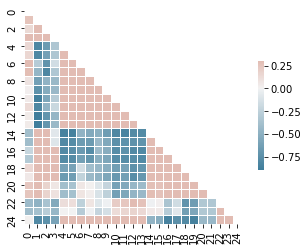

RangeIndex(start=0, stop=38, step=1) RangeIndex(start=0, stop=35, step=1) RangeIndex(start=0, stop=35, step=1)


In [302]:
# %%
#coding utf8
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# %%
def load_data():
    args = []
    prod_df = pd.read_csv('../data/productivity.csv')
    prod_new_df = pd.read_csv('../data/productivity_new.csv')
    sentiment_df = pd.read_csv('../data/sentiment.csv')
    hours_worked_df = pd.read_csv('../data/lfsa_ewhun2_1_Data.csv')
    productivity_df = pd.read_csv('../data/GDP_per_quarter.csv') 
    unem_df = pd.read_csv('../data/unem.csv')
    covid_df = pd.read_csv('../data/DataPerWeek.csv')
    unem_df.fillna(0)
    productivity_df.fillna(0)
    sentiment_df.fillna(0)
    prod_df.fillna(0)
    covid_df.fillna(0)
    args += [prod_df, sentiment_df, hours_worked_df, prod_new_df, productivity_df, unem_df, covid_df]
    return args

# %%
args = load_data()
prod_df, sentiment_df, hours_worked_df, prod_new_df, productivity_df, unem_df, covid_df = args
for i in np.linspace(2005, 2020, 16, endpoint=True):
    prod_df[[str(int(i))]] = prod_df[[str(int(i))]].apply(pd.to_numeric, errors="coerce")
print(prod_df.head(), sentiment_df.head(), hours_worked_df.head(), prod_new_df.head(), productivity_df.head(), unem_df.head(), covid_df.head())

#%%
prod_data = prod_df.iloc[0:71, 2:-1].replace(np.nan, 0).to_numpy(dtype = np.float64).T
time_data = np.repeat(np.array([np.linspace(2005, 2020, 16)]).transpose(), 71, 1)
plt.plot(time_data, prod_data)
plt.show()

#%%
corr = np.round(np.corrcoef(prod_df.iloc[0:25, 2:-1].replace(np.nan, 0).to_numpy(dtype = np.float16)), 3)
mask = np.triu(np.ones_like(corr, dtype=bool))
print(corr)
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()
#%%
prod_df.head(), productivity_df.head()

#%%
GDP_df = pd.read_excel('../data/GDP_per_quarter_2.xlsx', sheet_name='Sheet 1')
HW_df = pd.read_excel('../data/hours_worked.xlsx', sheet_name='Sheet 1')
employees_df = pd.read_excel('../data/Employees.xlsx', sheet_name='Sheet 1')
print(GDP_df.index, HW_df.index, employees_df.index)
GDP_df = GDP_df.loc[:, ~GDP_df.columns.str.contains('^Unnamed')]
HW_df = HW_df.loc[:, ~HW_df.columns.str.contains('^Unnamed')]
employees_df = employees_df.loc[:, ~employees_df.columns.str.contains('^Unnamed')]
GDP_df.replace(':', np.nan, inplace=True)
HW_df.replace(':', np.nan, inplace=True)
employees_df.replace(':', np.nan, inplace=True)
GDP_df.interpolate(method='linear', inplace=True)
HW_df.interpolate(method='linear', inplace=True)
employees_df.interpolate(method='linear', inplace=True)

def create_per_employeer(GDP_df, HW_df, employees_df):
    ''' This is a function to create a dataframe with the per-employee GDP and per hour worked '''
    cols =(list(set(GDP_df.columns) and set(employees_df.columns) and set(HW_df.columns)))
    cols.sort()
    idx = cols.pop()
    per_employee_df = pd.DataFrame(index=GDP_df.index, columns=cols)
    for i in cols:
        GDP_df[i] = GDP_df[i].apply(pd.to_numeric, errors="coerce")
        employees_df[i] = employees_df[i].apply(pd.to_numeric, errors="coerce")
        HW_df[i] = HW_df[i].apply(pd.to_numeric, errors="coerce")
        per_employee_df[i] = GDP_df[i]/employees_df[i]
        per_HW = per_employee_df[i]/HW_df[i]
    per_employee_df.index = GDP_df[idx]
    per_HW.index = GDP_df[idx]
    return per_employee_df, per_HW
per_employee_df, per_HW = create_per_employeer(GDP_df, HW_df, employees_df)

#print(per_employee_df.head(), per_HW.head())


In [303]:
per_employee_df

,2008-Q1,2008-Q2,2008-Q3,2008-Q4,2009-Q1,2009-Q2,2009-Q3,2009-Q4,2010-Q1,2010-Q2,...,2019-Q3,2019-Q4,2020-Q1,2020-Q2,2020-Q3,2020-Q4,2021-Q1,2021-Q2,2021-Q3,2021-Q4
TIME,,,,,,,,,,,,,,,,,,,,,
Belgium,22.560757,23.873680,22.491755,23.550260,22.360721,22.862207,22.508576,24.419903,22.760715,23.985635,...,27.952909,30.597291,28.022432,26.008691,27.708231,30.384407,29.304520,30.463900,29.654032,32.797095
Bulgaria,2.669705,3.068520,3.510293,3.509900,2.773878,3.265822,3.554014,3.713150,2.888632,3.456519,...,5.689253,6.077220,4.884264,5.341706,6.085626,6.383555,5.217496,5.987118,6.829871,7.387679
Czechia,8.914995,9.921593,10.427240,9.790631,8.334568,9.144258,9.605971,9.819170,9.050971,9.971068,...,13.357356,13.746098,12.450640,11.763819,12.952916,13.390329,12.561665,14.132169,14.303338,14.758361
Denmark,23.352974,24.174315,24.111718,24.406873,23.162066,23.539758,23.785051,25.332092,24.460992,25.571512,...,29.873202,31.011000,30.193802,29.834972,30.970074,32.141322,31.078993,32.465440,32.320438,34.123543
Germany (until 1990 former territory of the FRG),18.930790,19.091448,18.794552,18.690965,17.799558,17.784520,18.453160,18.579709,18.755646,18.934022,...,23.326132,23.477178,551.832360,507.064950,554.953666,569.135284,23.361990,23.589302,24.510983,25.027807
Estonia,6.747880,7.538948,7.210105,7.013278,6.380381,6.795442,6.611883,7.125941,6.808112,7.404242,...,12.533702,12.890639,11.387154,11.943073,12.585698,13.172993,12.172828,13.722078,14.346965,15.535682
Ireland,26.310162,25.666649,25.612371,25.624332,25.678115,25.948846,25.778749,25.473668,26.304957,26.259304,...,47.577504,46.818610,47.308321,45.390123,52.294520,48.852711,53.291592,50.867614,55.131934,17.740377
Greece,19.000034,20.154882,20.978582,20.996393,18.307956,20.325537,20.651731,21.633656,19.178486,19.744833,...,18.362384,17.397246,15.630405,14.654005,16.682628,16.231129,16.549761,16.785722,18.250849,4.204564
Spain,15.807677,16.790067,16.006881,17.463114,16.201118,17.155542,16.493534,17.778941,16.704689,17.591081,...,18.316183,19.365798,17.596664,16.291273,17.654726,18.580803,17.520152,18.331867,17.735874,19.482595


In [304]:
depage = pd.read_csv('../data/depression_by_age.csv') 

depage = depage.drop(['Prevalence - Depressive disorders - Sex: Both - Age: 10 to 14 (Percent)'],axis=1)
depage = depage.drop(['Prevalence - Depressive disorders - Sex: Both - Age: All Ages (Percent)'],axis=1)
depage = depage.drop(['Prevalence - Depressive disorders - Sex: Both - Age: 70+ years (Percent)'],axis=1)
depage = depage.drop(['Prevalence - Depressive disorders - Sex: Both - Age: Age-standardized (Percent)'],axis=1)
depage = depage.drop(['Prevalence - Depressive disorders - Sex: Both - Age: 15-49 years (Percent)'],axis=1)
a = ['Belgium','Bulgaria','Denmark','Germany','Estonia','Ireland','Greece','Spain','France','Croatia','Italy','Cyprus','Latvia','Lithuania','Luxemburg','Hungary','Malta','Netherlands','Austria','Poland','Portugal','Romania','Slovenia','Slovakia','Finland','Sweden','Iceland','Norway','Switzerland','United Kingdom','Montenegro','North Macedonia','Serbia','Turkey']
depage = depage[depage['Entity'].isin(a)]
depres_age = pd.DataFrame(depage)



depres_age['Age:15-69_depression_average']=depres_age.iloc[:,3:7].mean(axis=1,skipna=True)
depression_age= depres_age.pivot_table('Age:15-69_depression_average', ['Entity', 'Code'], 'Year')

#depres_age= depres_age.pivot_table('Prevalence - Depressive disorders - Sex: Both - Age: Age-standardized (Percent)', ['Entity', 'Code'], 'Year')
#arr = df2['Country'].unique()

#df3 = df1.set_index(['Entity','Code','Prevalence - Depressive disorders - Sex: Both - Age: Age-standardized (Percent)','Year'],drop=True).unstack('Year')
#df3

depression_age



,Year,1990.0,1991.0,1992.0,1993.0,1994.0,1995.0,1996.0,1997.0,1998.0,1999.0,...,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0
Entity,Code,,,,,,,,,,,,,,,,,,,,,
Austria,AUT,4.657487,4.645600,4.631697,4.614457,4.590899,4.565256,4.529441,4.473959,4.411869,4.348313,...,3.874706,3.873943,3.884459,3.893957,3.901112,3.902966,3.903100,3.904541,3.909877,3.919968
Belgium,BEL,4.044461,4.034123,4.024714,4.020813,4.022907,4.023277,4.023541,4.023906,4.024551,4.037635,...,4.556212,4.539968,4.505157,4.461023,4.418953,4.392940,4.381039,4.373711,4.381408,4.395594
Bulgaria,BGR,3.307005,3.301761,3.294277,3.285626,3.277215,3.267726,3.252918,3.234827,3.217468,3.197152,...,2.891782,2.881588,2.871204,2.864382,2.863722,2.864399,2.868763,2.877577,2.884754,2.896611
Croatia,HRV,3.852778,3.849834,3.840760,3.833354,3.824154,3.808413,3.792985,3.768534,3.739588,3.706437,...,3.247667,3.238956,3.234906,3.233876,3.231096,3.228554,3.221578,3.219657,3.228227,3.241465
Cyprus,CYP,3.927823,3.892489,3.861701,3.839690,3.820789,3.815944,3.816296,3.823692,3.827491,3.833098,...,3.710008,3.720196,3.740828,3.765914,3.790490,3.802320,3.795069,3.791430,3.837188,3.938864
Denmark,DNK,5.152903,5.128612,5.092694,5.058896,5.014001,4.968085,4.902357,4.811619,4.718897,4.622216,...,4.071869,4.067397,4.072525,4.078029,4.082927,4.083364,4.067379,4.056408,4.068515,4.097514
Estonia,EST,4.916440,4.891078,4.872838,4.862053,4.849188,4.840534,4.829834,4.818176,4.806558,4.785087,...,3.930319,3.866644,3.795326,3.734455,3.687227,3.667421,3.677448,3.690929,3.701515,3.718065
Finland,FIN,6.743626,6.715858,6.691834,6.670860,6.653815,6.640844,6.633785,6.634276,6.638292,6.634901,...,6.196769,6.141646,6.046789,5.936785,5.845964,5.800599,5.779931,5.759037,5.772166,5.793236
France,FRA,5.299959,5.254831,5.215363,5.182009,5.162721,5.158130,5.164671,5.182004,5.205822,5.224624,...,4.618401,4.602819,4.592858,4.583711,4.575853,4.570490,4.562949,4.559817,4.572124,4.604383


In [305]:
depression = depression_age.iloc[:,15:]
depression.reset_index(inplace=True)



In [306]:
depression['Age:15-69_depression_avg']=depression.iloc[:,5:16].mean(axis=1,skipna=True)
depression

/var/folders/2k/j21zjx350njdf7pt9pvz2js40000gn/T/ipykernel_16158/1893137186.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  depression['Age:15-69_depression_avg']=depression.iloc[:,5:16].mean(axis=1,skipna=True)


Year,Entity,Code,2005.0,2006.0,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,Age:15-69_depression_avg
0,Austria,AUT,4.083863,4.037775,3.984647,3.932948,3.894398,3.874706,3.873943,3.884459,3.893957,3.901112,3.902966,3.903100,3.904541,3.909877,3.919968,3.897819
1,Belgium,BEL,4.266715,4.319224,4.391753,4.470518,4.529200,4.556212,4.539968,4.505157,4.461023,4.418953,4.392940,4.381039,4.373711,4.381408,4.395594,4.455466
2,Bulgaria,BGR,3.028226,2.995716,2.962396,2.931426,2.908188,2.891782,2.881588,2.871204,2.864382,2.863722,2.864399,2.868763,2.877577,2.884754,2.896611,2.882526
3,Croatia,HRV,3.402938,3.364246,3.324635,3.289038,3.261386,3.247667,3.238956,3.234906,3.233876,3.231096,3.228554,3.221578,3.219657,3.228227,3.241465,3.239540
4,Cyprus,CYP,3.824126,3.809175,3.779702,3.748312,3.721036,3.710008,3.720196,3.740828,3.765914,3.790490,3.802320,3.795069,3.791430,3.837188,3.938864,3.765708
5,Denmark,DNK,4.231100,4.187147,4.146883,4.109055,4.084853,4.071869,4.067397,4.072525,4.078029,4.082927,4.083364,4.067379,4.056408,4.068515,4.097514,4.076575
6,Estonia,EST,4.364100,4.281716,4.188273,4.093089,4.002988,3.930319,3.866644,3.795326,3.734455,3.687227,3.667421,3.677448,3.690929,3.701515,3.718065,3.804306
7,Finland,FIN,6.240899,6.219611,6.213740,6.216123,6.213358,6.196769,6.141646,6.046789,5.936785,5.845964,5.800599,5.779931,5.759037,5.772166,5.793236,5.973561
8,France,FRA,4.932434,4.870309,4.793429,4.720823,4.656159,4.618401,4.602819,4.592858,4.583711,4.575853,4.570490,4.562949,4.559817,4.572124,4.604383,4.601455
9,Germany,DEU,4.645292,4.646698,4.638559,4.634948,4.626955,4.622184,4.620408,4.629116,4.628302,4.631207,4.619566,4.548680,4.432185,4.322971,4.201171,4.574229


In [307]:
per_employee_df.reset_index(inplace = True)

per_employee_df.drop(index = [2,35,36,37],inplace=True)


In [311]:
per_employee = per_employee_df.reindex([19,0,1,10,12,3,5,25,9,4,7,16,27,6,11,13,14,17,31,18,32,28,20,21,22,33,23,8,26,29,34,30])
per_employee.reset_index(inplace = True)
employee_prod = per_employee.drop(['index'],axis=1)
employee_prod

,TIME,2008-Q1,2008-Q2,2008-Q3,2008-Q4,2009-Q1,2009-Q2,2009-Q3,2009-Q4,2010-Q1,...,2019-Q3,2019-Q4,2020-Q1,2020-Q2,2020-Q3,2020-Q4,2021-Q1,2021-Q2,2021-Q3,2021-Q4
0,Austria,20.687781,21.628591,21.217645,21.898095,20.293193,20.904611,20.888146,22.106489,20.476532,...,25.792943,27.203558,25.357744,24.013843,25.440437,26.405831,24.976529,26.958439,27.039260,10.248132
1,Belgium,22.560757,23.873680,22.491755,23.550260,22.360721,22.862207,22.508576,24.419903,22.760715,...,27.952909,30.597291,28.022432,26.008691,27.708231,30.384407,29.304520,30.463900,29.654032,32.797095
2,Bulgaria,2.669705,3.068520,3.510293,3.509900,2.773878,3.265822,3.554014,3.713150,2.888632,...,5.689253,6.077220,4.884264,5.341706,6.085626,6.383555,5.217496,5.987118,6.829871,7.387679
3,Croatia,8.012381,8.815869,9.277466,8.439915,7.446713,8.328873,8.746550,8.236797,7.823569,...,10.608619,9.313402,8.629288,8.087074,9.322415,8.912730,8.750018,9.738087,11.281049,0.691545
4,Cyprus,15.014955,15.831527,16.270584,15.538111,14.993643,15.424910,15.437214,15.471997,14.951472,...,16.838364,16.193476,15.584305,14.033604,16.002558,15.334078,15.086361,15.675756,15.888773,15.708193
5,Denmark,23.352974,24.174315,24.111718,24.406873,23.162066,23.539758,23.785051,25.332092,24.460992,...,29.873202,31.011000,30.193802,29.834972,30.970074,32.141322,31.078993,32.465440,32.320438,34.123543
6,Estonia,6.747880,7.538948,7.210105,7.013278,6.380381,6.795442,6.611883,7.125941,6.808112,...,12.533702,12.890639,11.387154,11.943073,12.585698,13.172993,12.172828,13.722078,14.346965,15.535682
7,Finland,21.551820,22.103757,21.695812,23.180999,20.820281,21.243420,21.047427,23.069153,21.363237,...,26.809267,28.914940,27.085462,26.812793,27.067125,29.418447,27.848168,28.912486,28.942959,31.504026
8,France,21.562387,21.791431,20.979927,21.850713,21.067751,21.101674,20.649842,22.141235,21.589493,...,25.455131,26.440734,24.657022,22.663525,24.956282,26.081403,25.431133,25.650639,25.587892,27.009519
9,Germany (until 1990 former territory of the FRG),18.930790,19.091448,18.794552,18.690965,17.799558,17.784520,18.453160,18.579709,18.755646,...,23.326132,23.477178,551.832360,507.064950,554.953666,569.135284,23.361990,23.589302,24.510983,25.027807


In [312]:

employee_prod['Average_Productivity']=employee_prod.iloc[:,1:48].mean(axis=1,skipna=True)
employee_prod

,TIME,2008-Q1,2008-Q2,2008-Q3,2008-Q4,2009-Q1,2009-Q2,2009-Q3,2009-Q4,2010-Q1,...,2019-Q4,2020-Q1,2020-Q2,2020-Q3,2020-Q4,2021-Q1,2021-Q2,2021-Q3,2021-Q4,Average_Productivity
0,Austria,20.687781,21.628591,21.217645,21.898095,20.293193,20.904611,20.888146,22.106489,20.476532,...,27.203558,25.357744,24.013843,25.440437,26.405831,24.976529,26.958439,27.039260,10.248132,23.264418
1,Belgium,22.560757,23.873680,22.491755,23.550260,22.360721,22.862207,22.508576,24.419903,22.760715,...,30.597291,28.022432,26.008691,27.708231,30.384407,29.304520,30.463900,29.654032,32.797095,25.811662
2,Bulgaria,2.669705,3.068520,3.510293,3.509900,2.773878,3.265822,3.554014,3.713150,2.888632,...,6.077220,4.884264,5.341706,6.085626,6.383555,5.217496,5.987118,6.829871,7.387679,4.210634
3,Croatia,8.012381,8.815869,9.277466,8.439915,7.446713,8.328873,8.746550,8.236797,7.823569,...,9.313402,8.629288,8.087074,9.322415,8.912730,8.750018,9.738087,11.281049,0.691545,8.746281
4,Cyprus,15.014955,15.831527,16.270584,15.538111,14.993643,15.424910,15.437214,15.471997,14.951472,...,16.193476,15.584305,14.033604,16.002558,15.334078,15.086361,15.675756,15.888773,15.708193,15.337204
5,Denmark,23.352974,24.174315,24.111718,24.406873,23.162066,23.539758,23.785051,25.332092,24.460992,...,31.011000,30.193802,29.834972,30.970074,32.141322,31.078993,32.465440,32.320438,34.123543,27.369478
6,Estonia,6.747880,7.538948,7.210105,7.013278,6.380381,6.795442,6.611883,7.125941,6.808112,...,12.890639,11.387154,11.943073,12.585698,13.172993,12.172828,13.722078,14.346965,15.535682,9.017067
7,Finland,21.551820,22.103757,21.695812,23.180999,20.820281,21.243420,21.047427,23.069153,21.363237,...,28.914940,27.085462,26.812793,27.067125,29.418447,27.848168,28.912486,28.942959,31.504026,24.493601
8,France,21.562387,21.791431,20.979927,21.850713,21.067751,21.101674,20.649842,22.141235,21.589493,...,26.440734,24.657022,22.663525,24.956282,26.081403,25.431133,25.650639,25.587892,27.009519,23.252891
9,Germany (until 1990 former territory of the FRG),18.930790,19.091448,18.794552,18.690965,17.799558,17.784520,18.453160,18.579709,18.755646,...,23.477178,551.832360,507.064950,554.953666,569.135284,23.361990,23.589302,24.510983,25.027807,20.664680


In [310]:
correl_signif = pearsonr(employee_prod['Average_Productivity'], depression['Age:15-69_depression_avg'])
correl = correl_signif[0]
correl

0.5803147012498111